In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from predicting_bike_usage.config import INTERIM_DATA_DIR
from predicting_bike_usage.visualization import visualize
from highlight_text import fig_text
from matplotlib import pyplot as plt
from predicting_bike_usage.features import add_weekend_feature

2025-01-20 11:03:15.580 | INFO     | predicting_bike_usage.config:<module>:11 - PROJ_ROOT path is: /home/daniel/Projects/predicting-bike-usage


In [3]:
bike_df = pd.read_csv(INTERIM_DATA_DIR / "train_dataset.csv")

I think the most important discovery in Notebook 1.0 is about the impact of work on bike rental patterns. From the relationship between bike rentals and hours, we can observe a pattern with peaks corresponding to the start and end of the workday. However, when examining the relationship between bike rentals and holidays, we conclude that the number of bikes rented tends to decline on holidays. This leads us to hypothesize that bikes are primarily used for commuting to work.

As a result, we want to analyze the relationship between weekdays and weekends. We suspect that since work activities typically decline on weekends, the number of bike rentals may also be lower during these times.



In [4]:
bike_df = add_weekend_feature(bike_df)

In [5]:
bike_df.head()

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                995    15         13.2        61         3.9         719   
1               1195     9         22.9        86         1.7         538   
2               1448    19         11.2        46         1.4         869   
3                178    23         -2.6        69         2.0        1434   
4               1980    22         27.2        73         1.5        1005   

   Dew point temperature  Solar Radiation  Rainfall  Snowfall Seasons  \
0                    5.8             1.03       0.0       0.0  Autumn   
1                   20.4             0.76       0.0       0.0  Summer   
2                    0.0             0.00       0.0       0.0  Autumn   
3                   -7.5             0.00       0.0       0.0  Winter   
4                   21.9             0.00       0.0       0.0  Summer   

      Holiday Functioning Day  is_weekend  
0  No Holiday             Yes           0  
1  No Holiday             Yes           0  
2  No Holiday             Yes           0  
3  No Holiday             Yes           0  
4  No Holiday             Yes           0

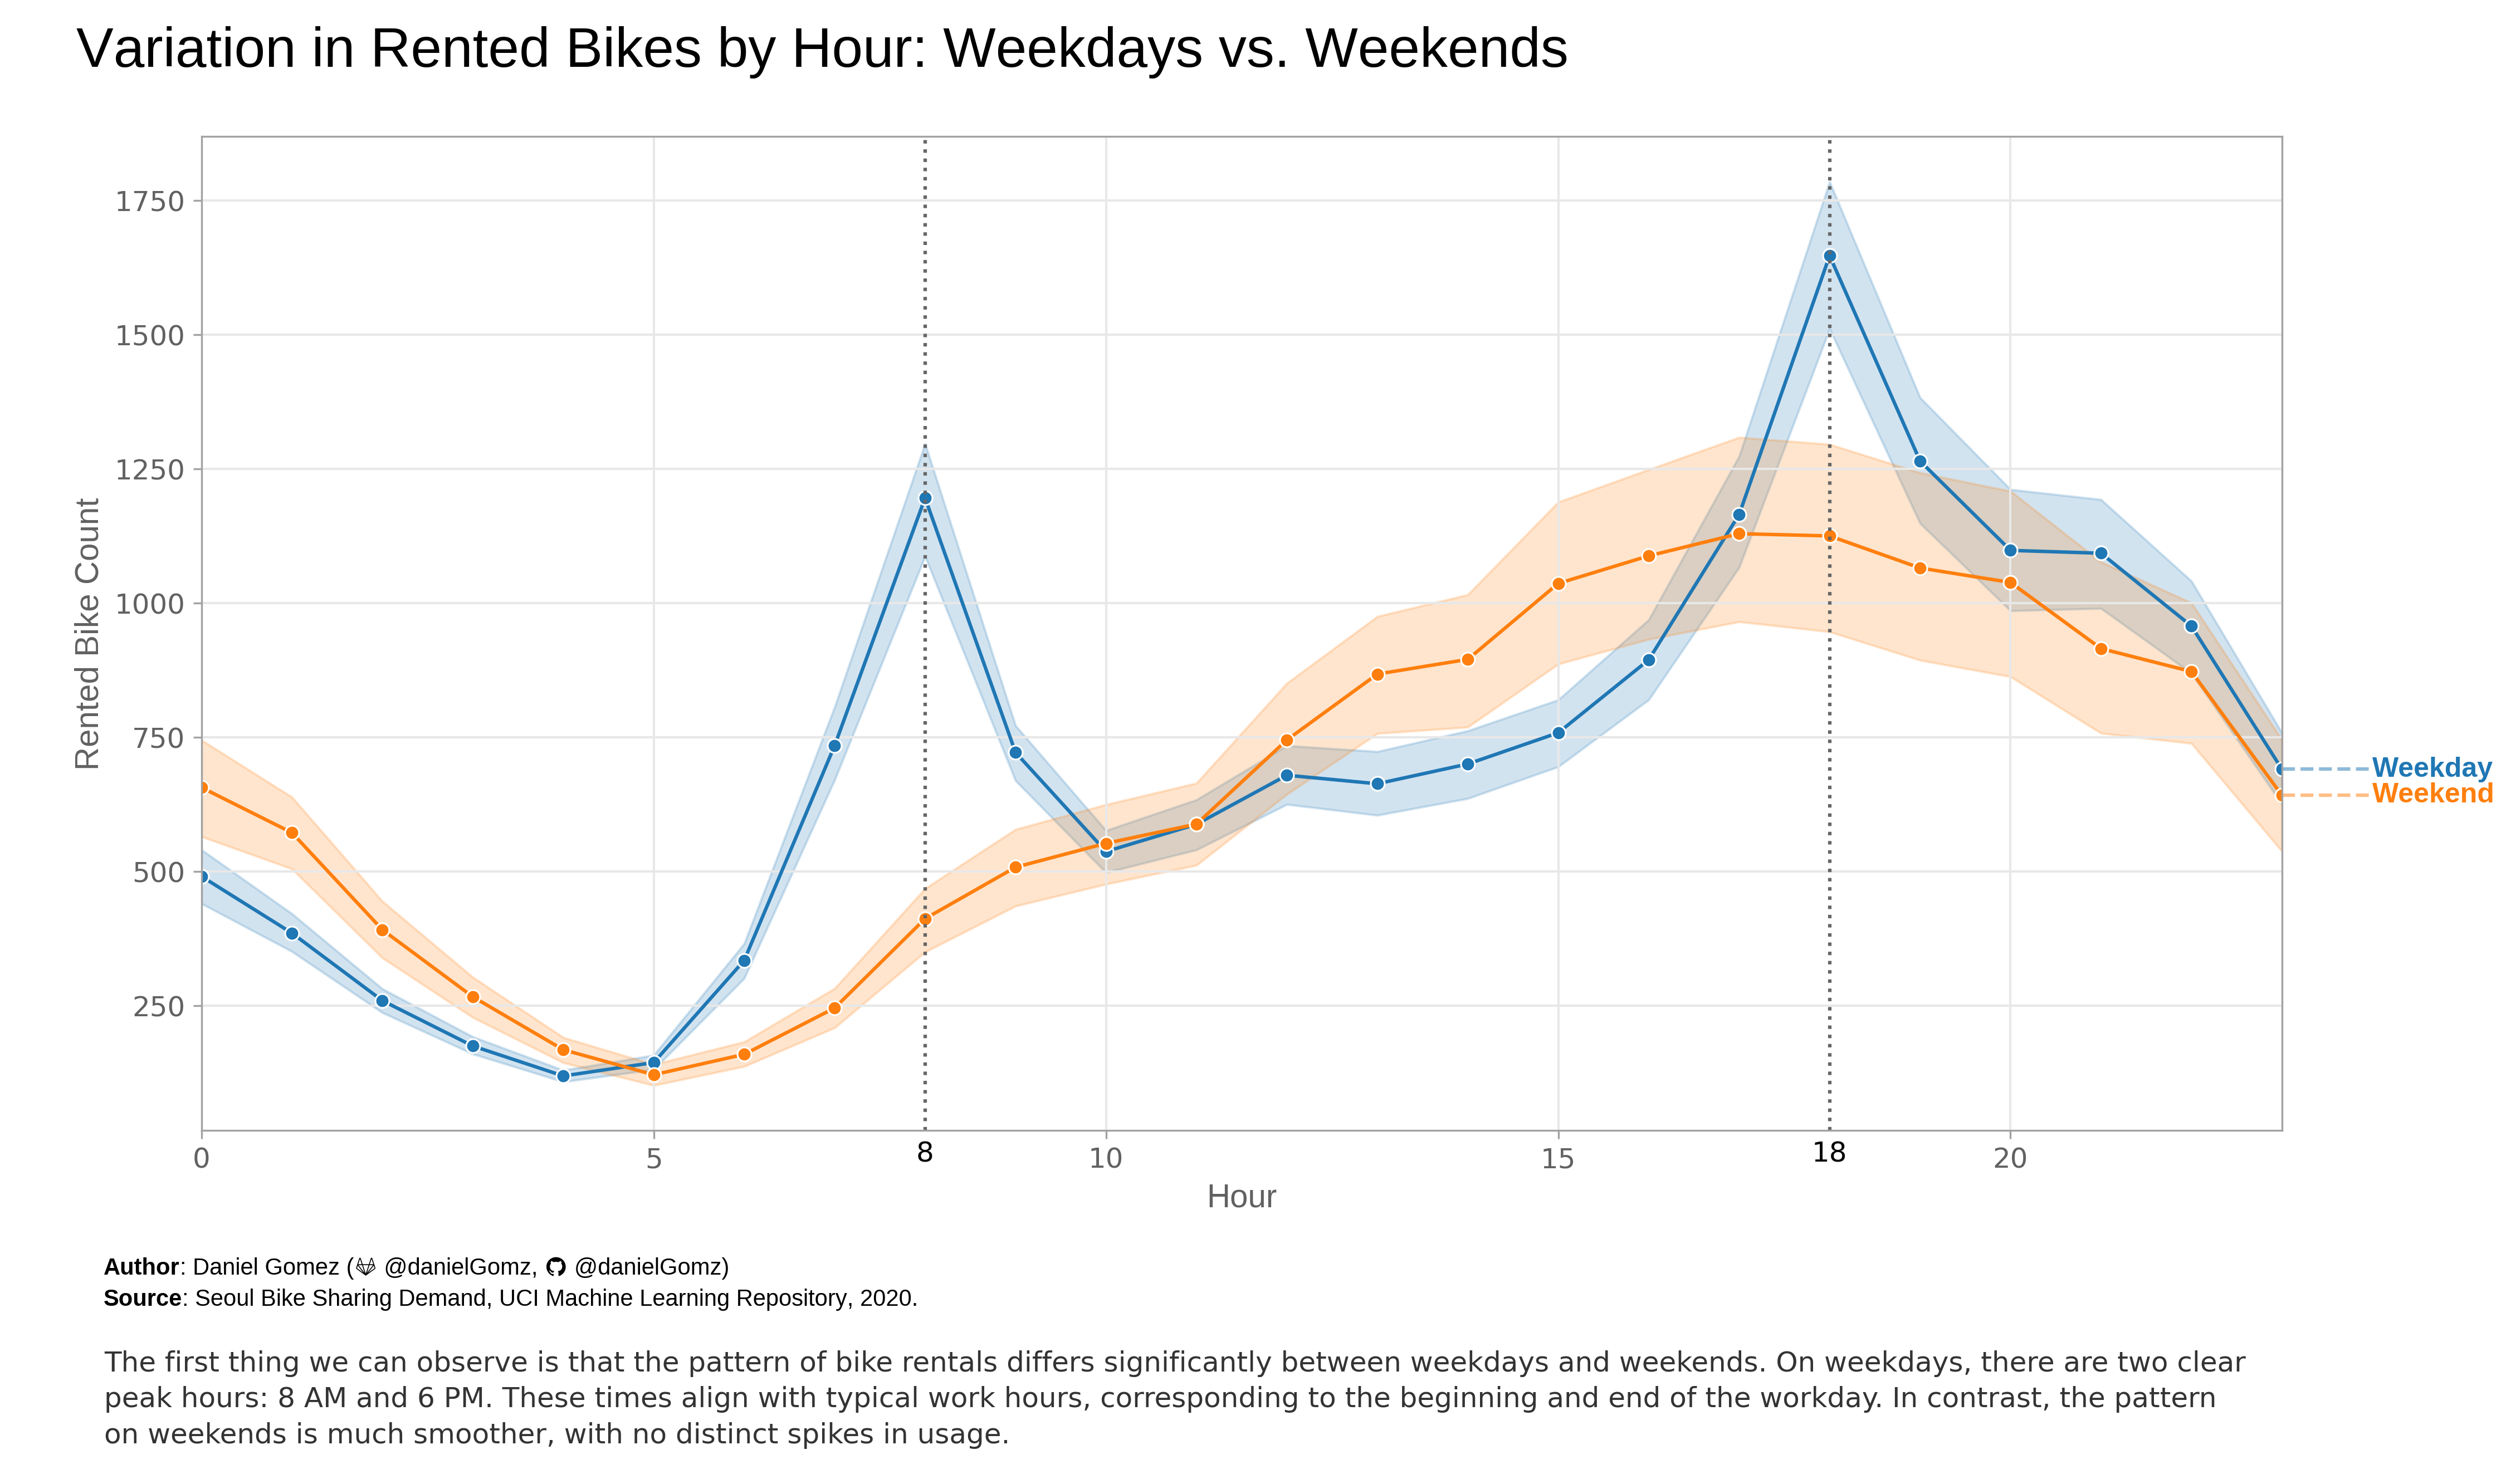

In [6]:
fig, ax = visualize.mean_by_time_and_category(
    time_var=bike_df["Hour"],
    numeric_var=bike_df["Rented Bike Count"],
    category_var=bike_df["is_weekend"].map({0: "Weekday", 1: "Weekend"}),
    add_ci=True,
    title="Variation in Rented Bikes by Hour: Weekdays vs. Weekends",
)
ax.axvline(8, color="#666666", ls="dotted")
ax.axvline(18, color="#666666", ls="dotted")
ax.text(
    8,
    -40,
    "8",
    horizontalalignment="center",
    fontsize=12,
)
ax.text(
    18,
    -40,
    "18",
    horizontalalignment="center",
    fontsize=12,
)
fig_text(
    s='''The first thing we can observe is that the pattern of bike rentals differs significantly between weekdays and weekends. On weekdays, there are two clear
peak hours: 8 AM and 6 PM. These times align with typical work hours, corresponding to the beginning and end of the workday. In contrast, the pattern
on weekends is much smoother, with no distinct spikes in usage.
''',
    x=0.03125, y=-0.18,
    fontsize='12',
    color='#333333',
    ha='left', va='bottom'
)

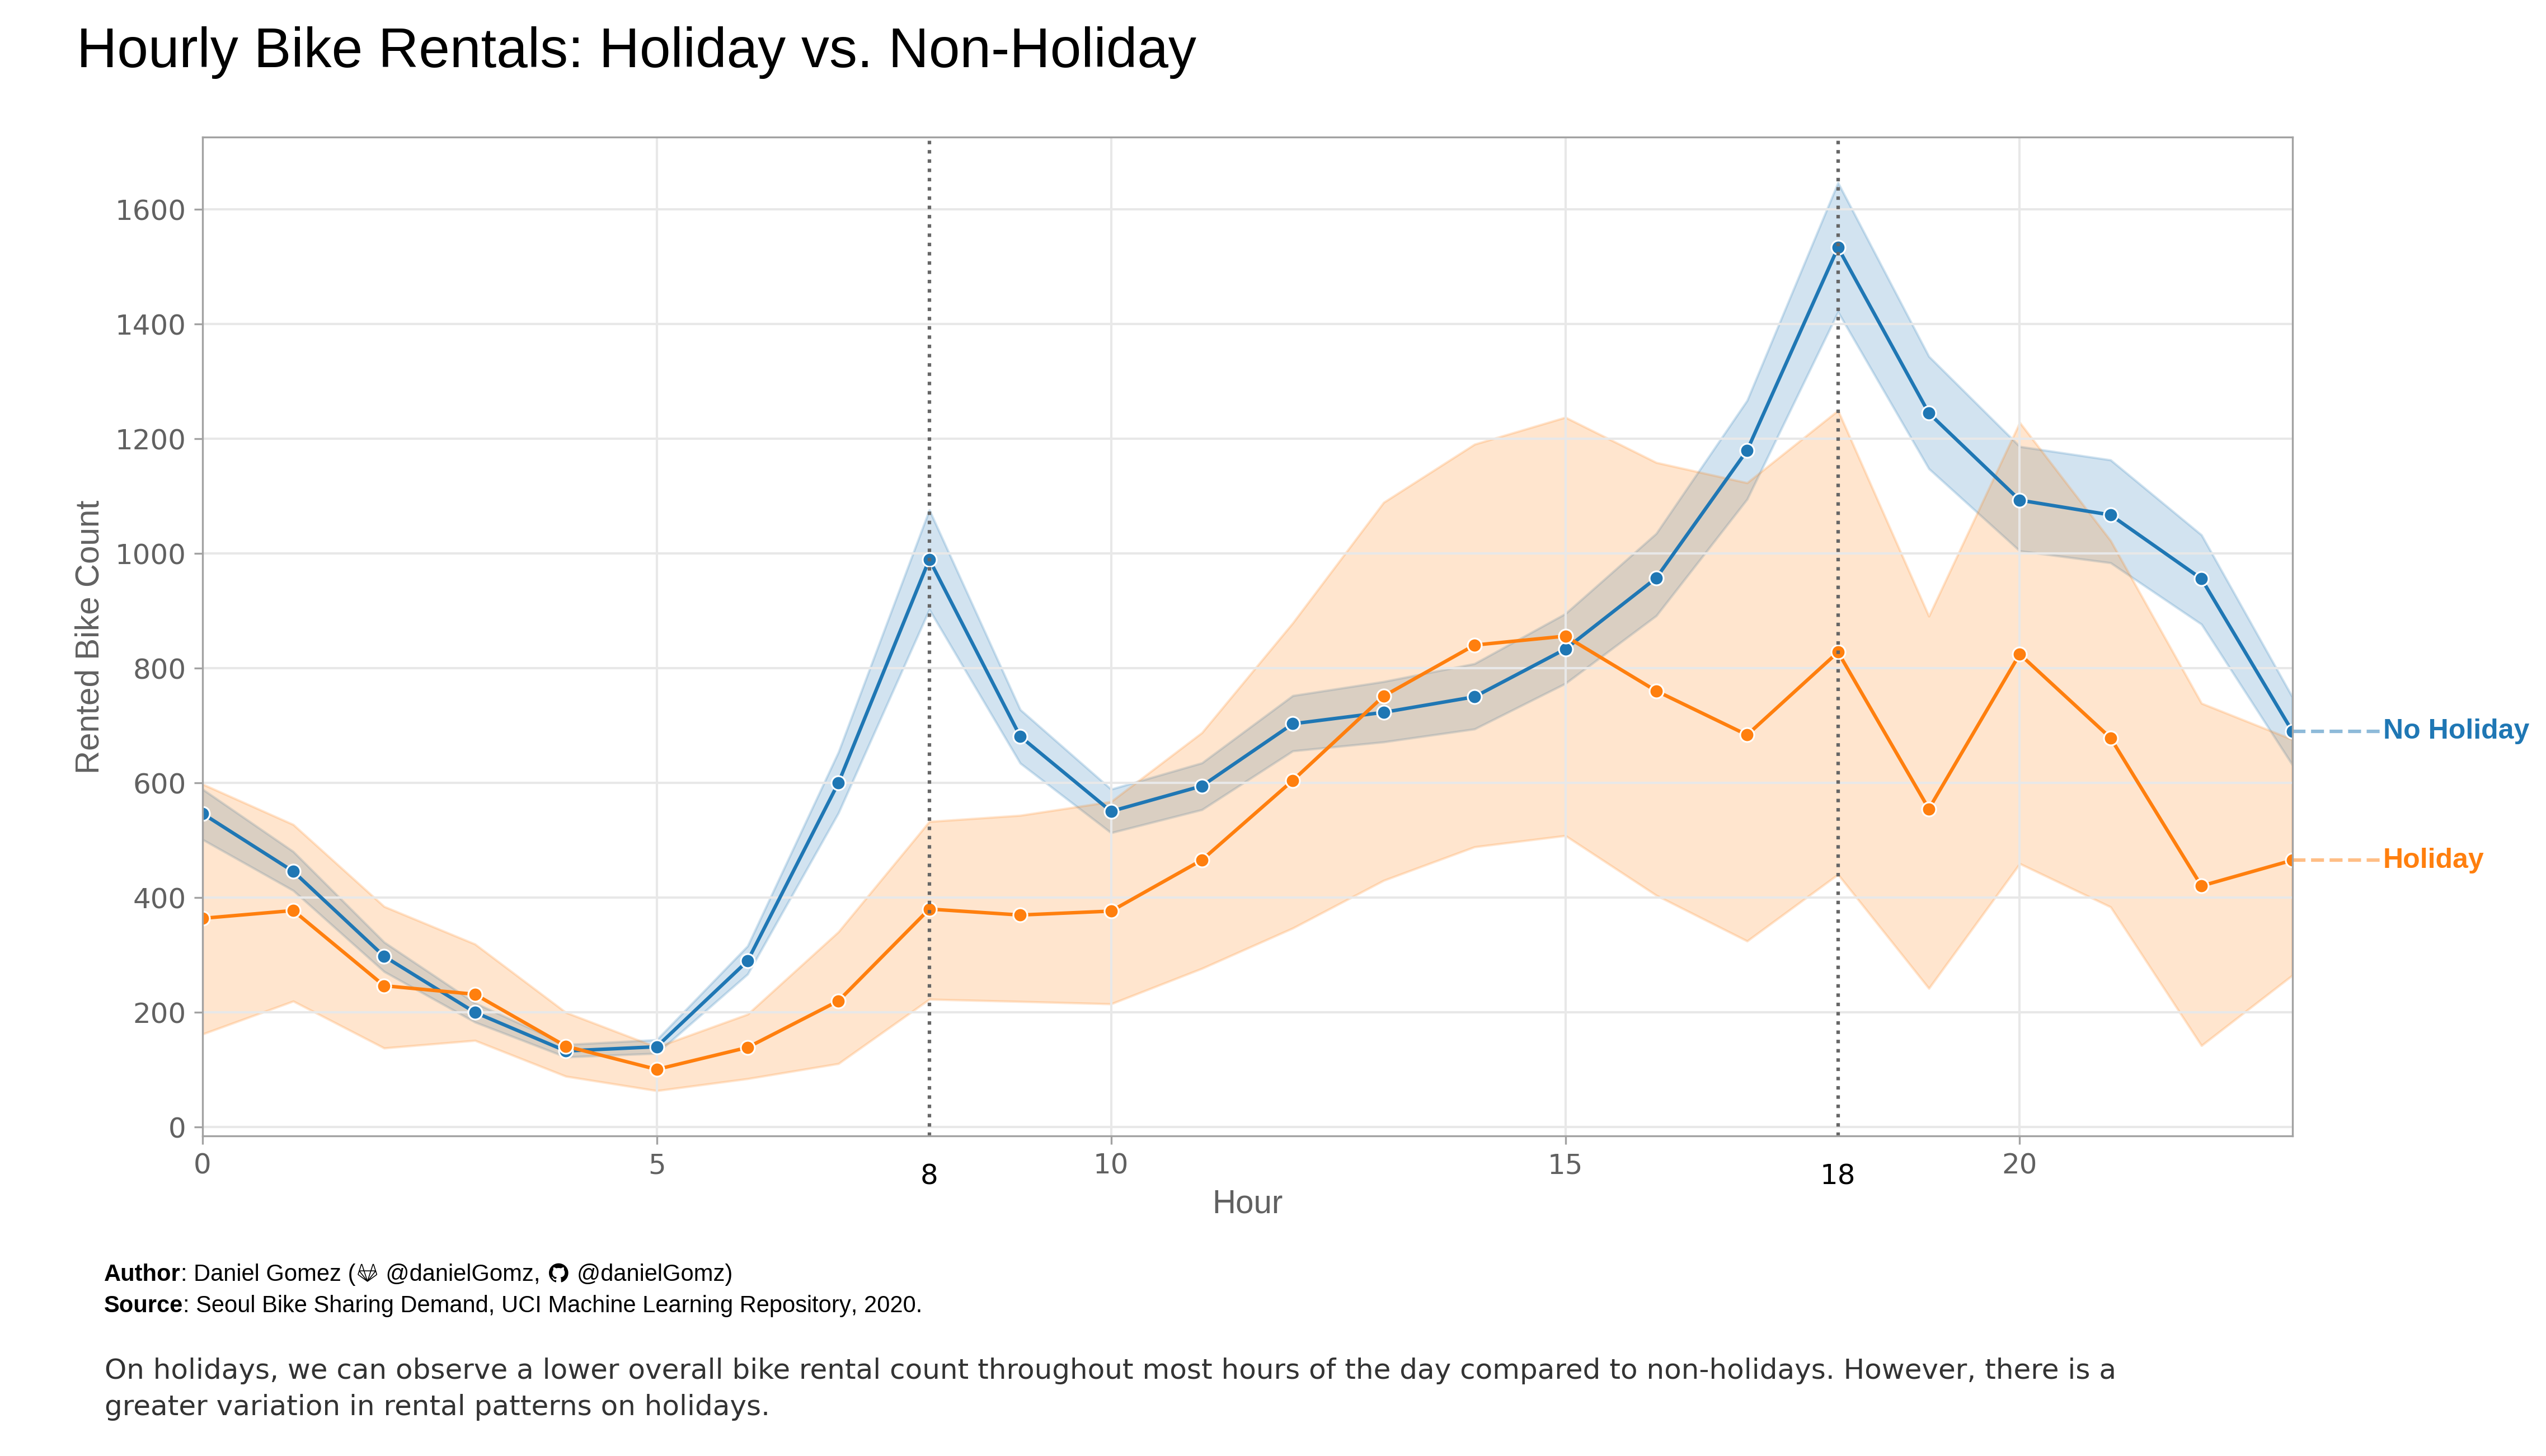

In [7]:
fig, ax = visualize.mean_by_time_and_category(
    time_var=bike_df["Hour"],
    numeric_var=bike_df["Rented Bike Count"],
    category_var=bike_df["Holiday"],
    title="Hourly Bike Rentals: Holiday vs. Non-Holiday",
)
ax.axvline(8, color="#666666", ls="dotted")
ax.axvline(18, color="#666666", ls="dotted")
ax.text(
    8,
    -100,
    "8",
    horizontalalignment="center",
    fontsize=12,
)
ax.text(
    18,
    -100,
    "18",
    horizontalalignment="center",
    fontsize=12,
)
fig_text(
    s="""On holidays, we can observe a lower overall bike rental count throughout most hours of the day compared to non-holidays. However, there is a
greater variation in rental patterns on holidays.
""",
    x=0.03125,
    y=-0.15,
    fontsize="12",
    color="#333333",
    ha="left",
    va="bottom",
)

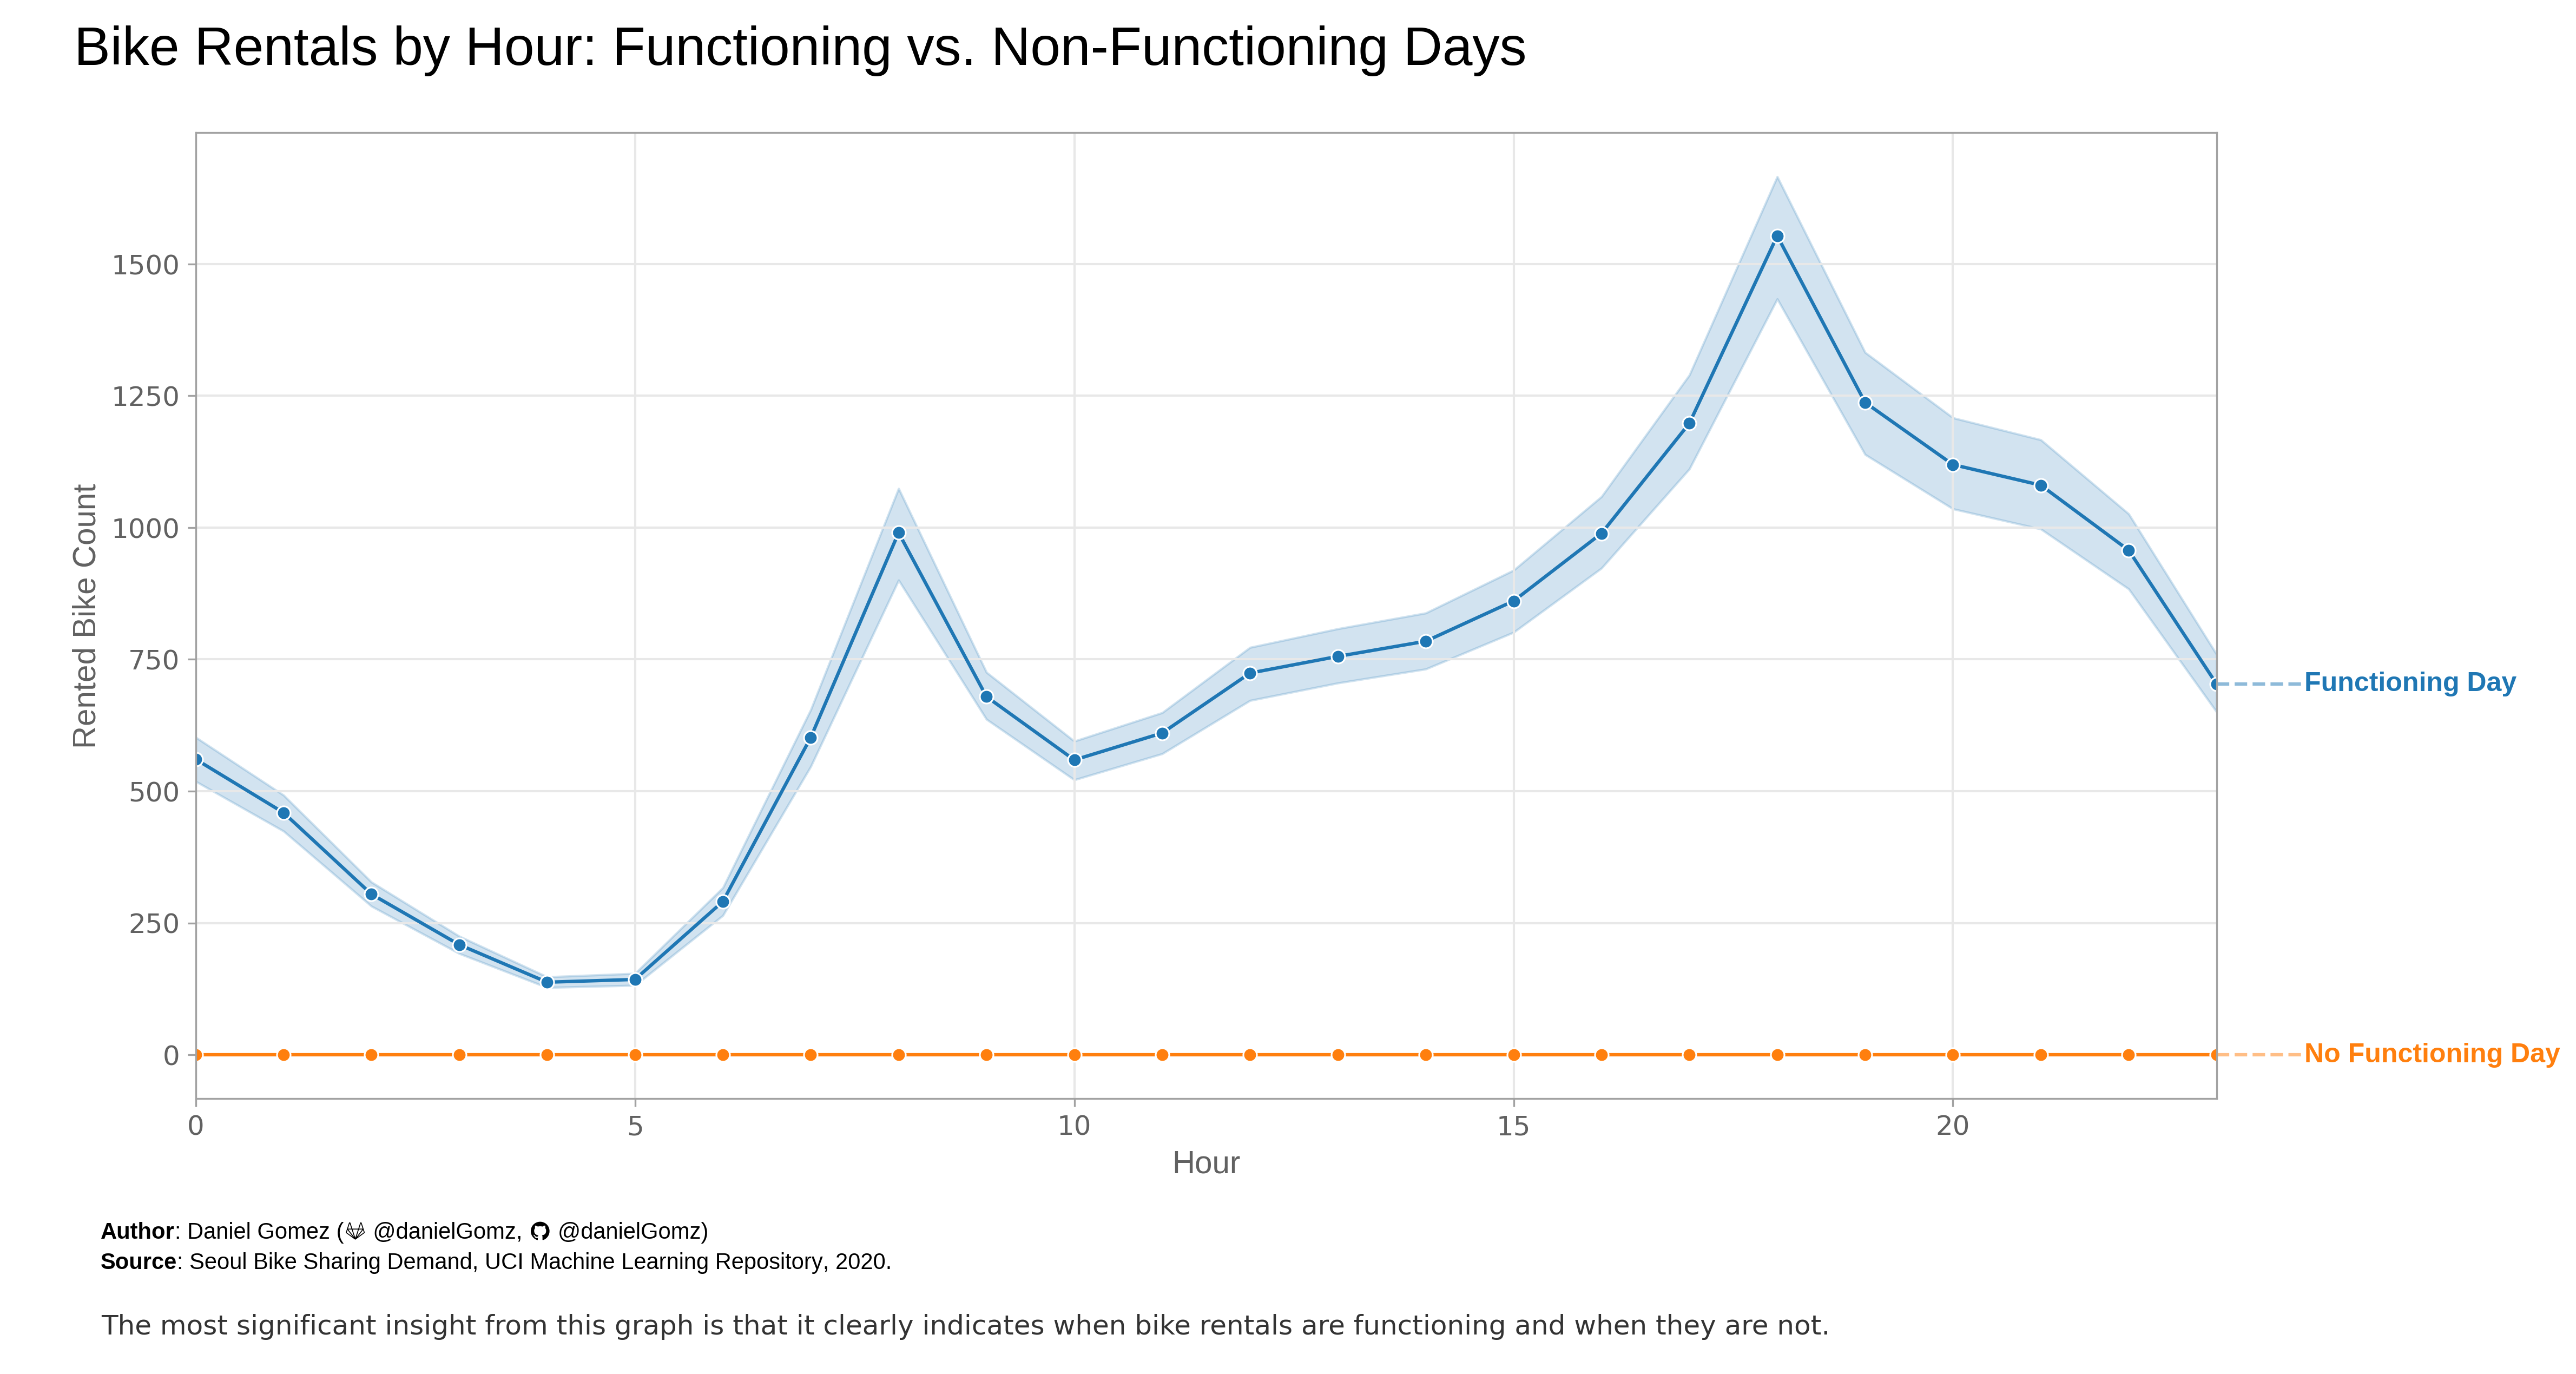

In [8]:
fig, ax = visualize.mean_by_time_and_category(
    time_var=bike_df["Hour"],
    numeric_var=bike_df["Rented Bike Count"],
    category_var=bike_df["Functioning Day"].map(
        {"Yes": "Functioning Day", "No": "No Functioning Day"}
    ),
    title="Bike Rentals by Hour: Functioning vs. Non-Functioning Days",
)
fig_text(
    s="""The most significant insight from this graph is that it clearly indicates when bike rentals are functioning and when they are not.
""",
    x=0.03125,
    y=-0.12,
    fontsize="12",
    color="#333333",
    ha="left",
    va="bottom",
)

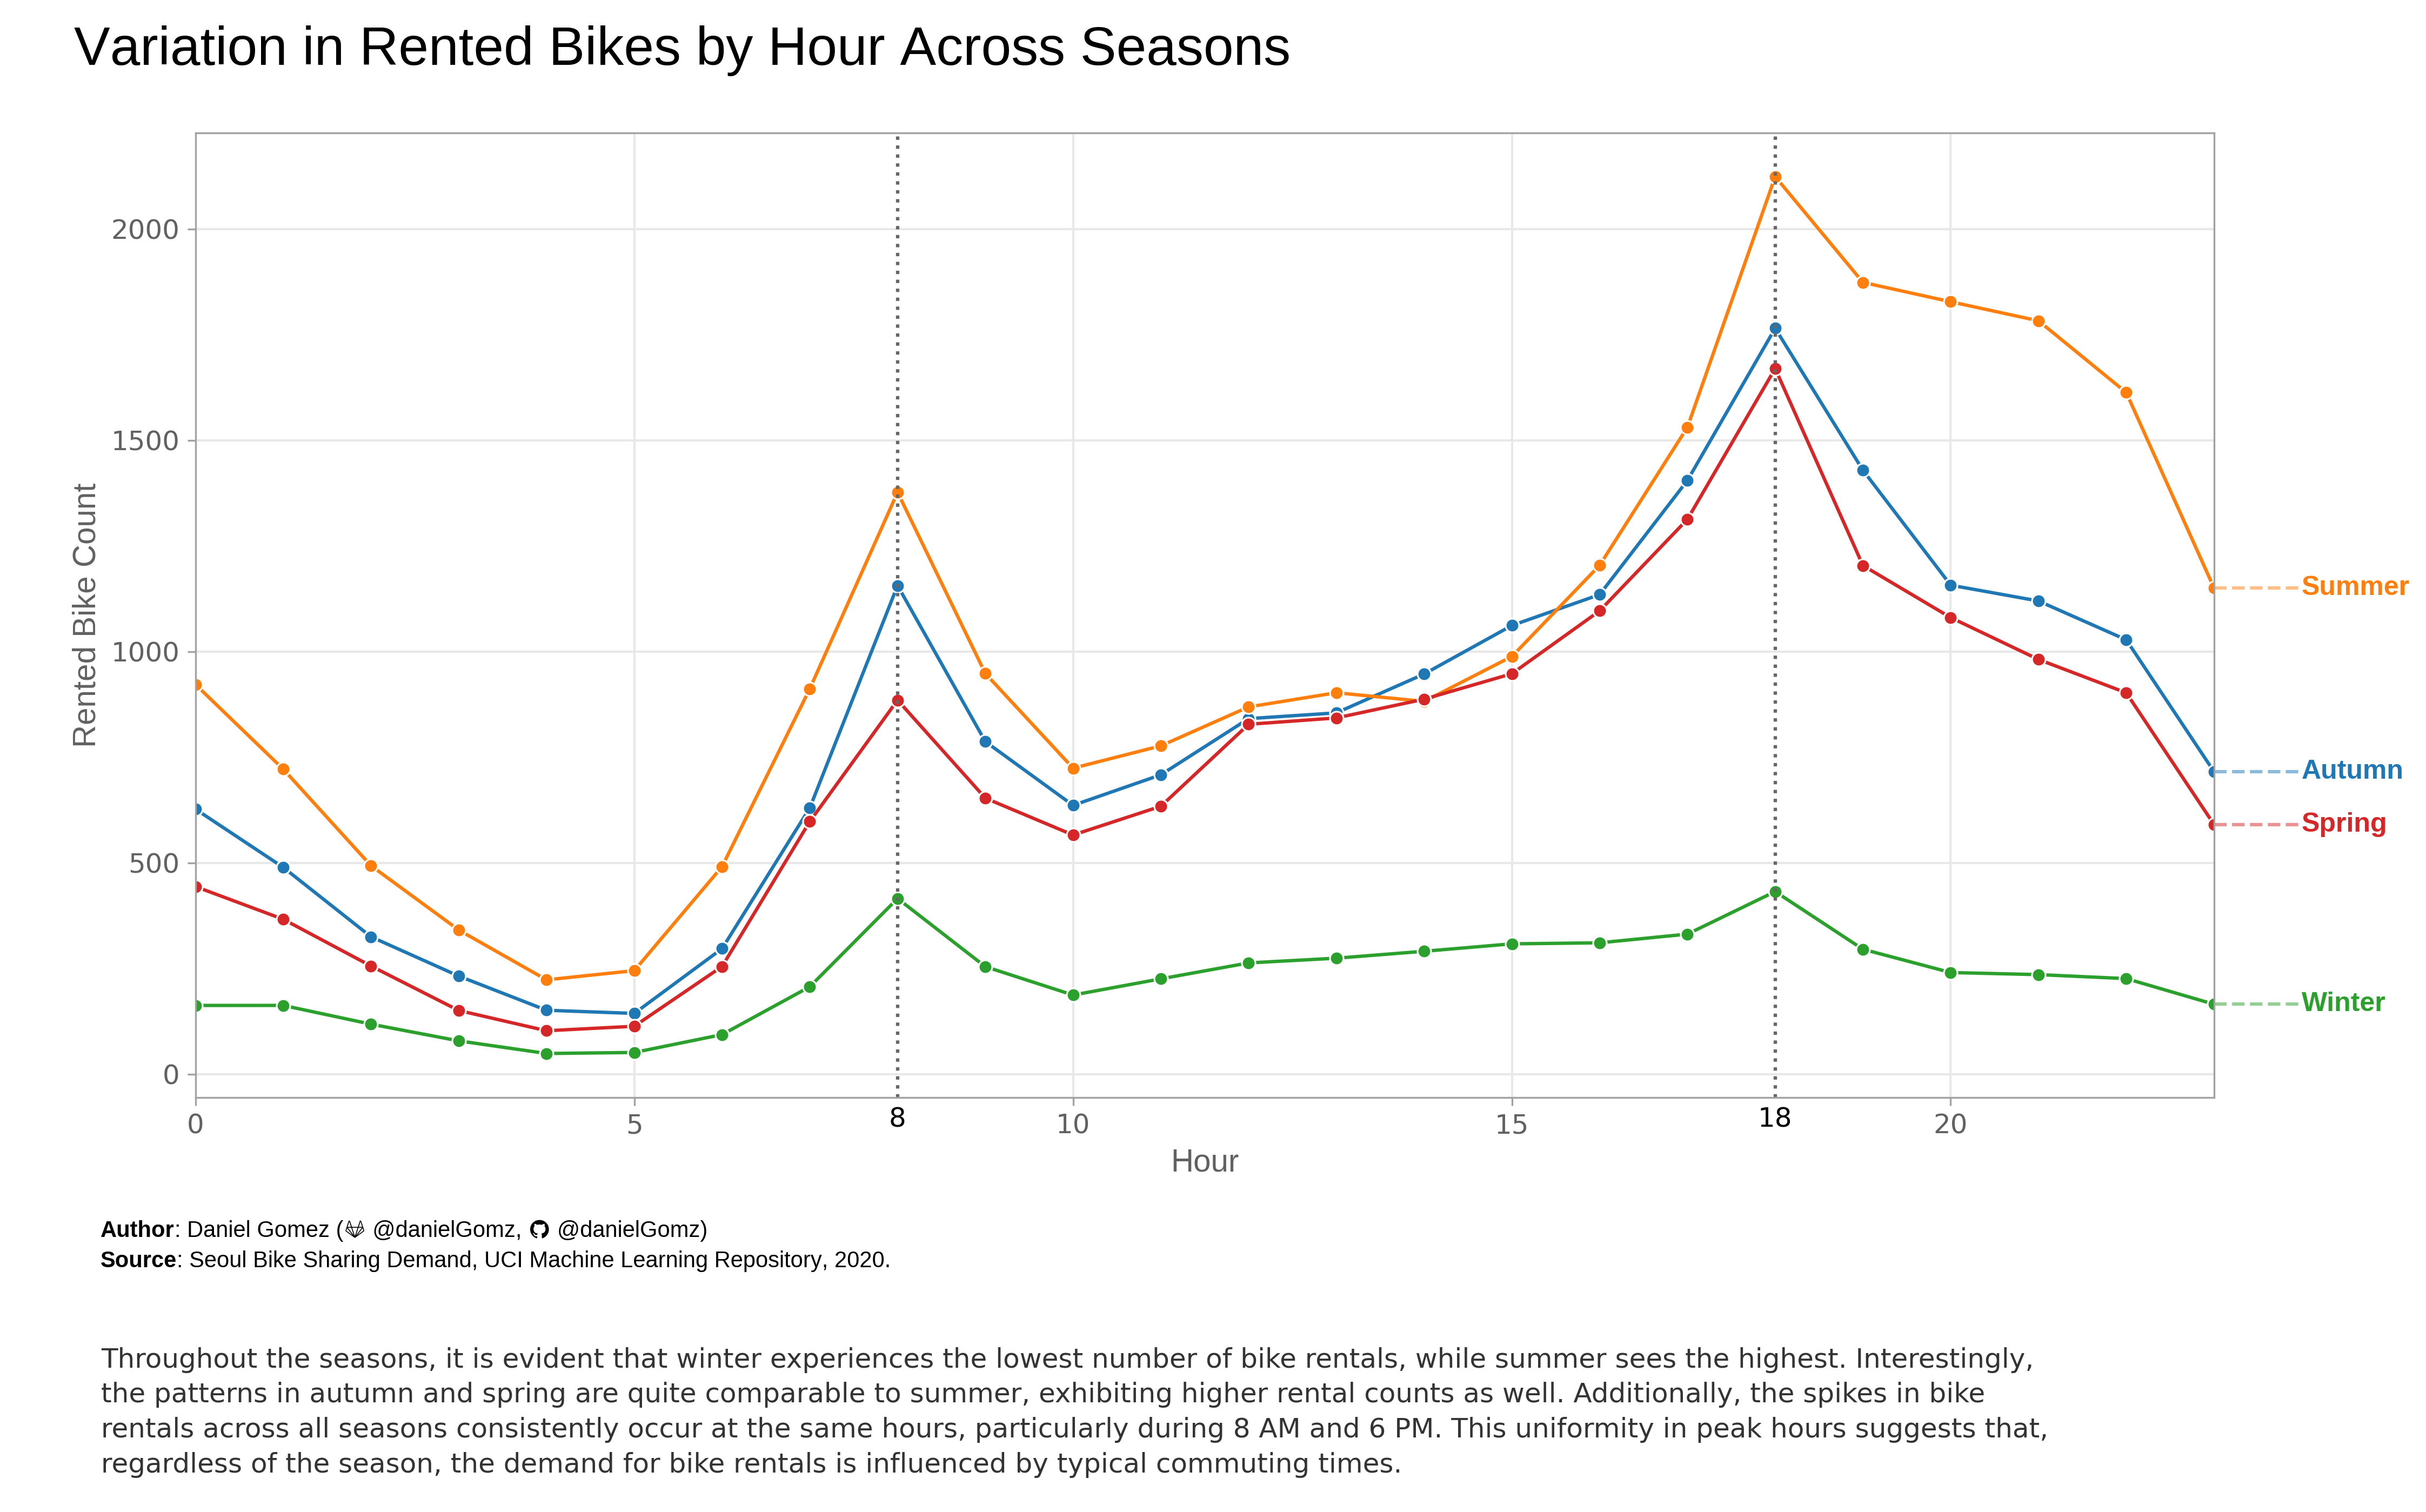

In [9]:
fig, ax = visualize.mean_by_time_and_category(
    time_var=bike_df["Hour"],
    numeric_var=bike_df["Rented Bike Count"],
    category_var=bike_df["Seasons"],
    add_ci=False,
    title="Variation in Rented Bikes by Hour Across Seasons",
)
ax.axvline(8, color="#666666", ls="dotted")
ax.axvline(18, color="#666666", ls="dotted")
ax.text(
    8,
    -125,
    "8",
    horizontalalignment="center",
    fontsize=12,
)
ax.text(
    18,
    -125,
    "18",
    horizontalalignment="center",
    fontsize=12,
)
fig_text(
    s="""Throughout the seasons, it is evident that winter experiences the lowest number of bike rentals, while summer sees the highest. Interestingly,
the patterns in autumn and spring are quite comparable to summer, exhibiting higher rental counts as well. Additionally, the spikes in bike
rentals across all seasons consistently occur at the same hours, particularly during 8 AM and 6 PM. This uniformity in peak hours suggests that,
regardless of the season, the demand for bike rentals is influenced by typical commuting times.
""",
    x=0.03125,
    y=-0.12,
    fontsize="12",
    color="#333333",
    ha="left",
    va="top",
)